# Crop-Fertilizer Recommendation System

## Business Understanding

### Problem Statement :

Farmers face significant challenges in maximizing crop yield, primarily due to the improper selection and application of fertilizers.

Among the challenges farmers face include:
- Crop Selection Uncertainty: Farmers may not know which crops are best suited for their soil and climate conditions, leading to poor yields and economic loss.


- Fertilizer Mismanagement: Incorrect use of fertilizers can result in soil nutrient imbalances, affecting crop health and yield. Farmers may not know the right type or amount of fertilizer required for their crops.


- Plant Disease Identification: Identifying plant diseases can be difficult for farmers, especially without expert knowledge. Delayed or incorrect diagnosis can lead to severe crop damage and lower productivity.

To enhance decision-making, a data-driven recommendation system is needed that provides personalized, actionable insights.

### Objective

The primary goal of this project is to develop an intelligent crop and fertilizer recommendation system that assists farmers in optimizing their farming practices. The system will recommend the most suitable crops and fertilizers based on factors such as soil composition, crop type and weather patterns. By leveraging machine learning and data analytics, the system aims to improve crop yields, reduce costs, and promote sustainable agricultural practices.


### Solutions and Benefits

The solutions the recommendation sytem will provide include:

- Crop Recommendation: By using machine learning to analyze soil data provided by the user, your application can predict the most suitable crops for a specific soil type, enabling farmers to make informed decisions and improve yields.


- Fertilizer Recommendation: Based on the user's soil data and the type of crop they are growing, the application can recommend the appropriate fertilizer by identifying any deficiencies or excess nutrients in the soil, ensuring better crop growth and healthier soil.


- Plant Disease Prediction: The image recognition feature allows users to upload images of diseased plant leaves. The application then predicts the disease and offers background information and treatment suggestions, enabling timely and effective intervention.


The key benefits of using our recommendation system include:
1. Increased Crop Yield: Farmers will receive precise recommendations for crops and fertilizers, leading to significant improvements in crop productivity.
2. Cost Efficiency: By optimizing fertilizer use and avoiding over-application, farmers can reduce costs while maintaining or increasing yields.
3. Sustainability: The system will promote responsible fertilizer use, reducing the risk of soil degradation and environmental pollution.
4. Personalized Recommendations: Tailored insights based on specific farm conditions (soil properties, climate, and crop type) ensure relevant and actionable advice for each farmer.
5. Disease Management: By integrating plant disease prediction features, the system can help farmers identify and treat crop diseases in a timely manner, minimizing losses.

## Data Understanding

- Crop Dataset: Contains information on various crops, including environmental conditions (temperature, humidity, pH), soil type, and yield data. This data helps identify suitable crops for specific conditions and regions.


- Fertilizer Dataset: Contains details on different fertilizers and their effects on various crops. This is key for understanding optimal fertilizer types and quantities for improved yield.


- Disease Dataset: Includes data on plant diseases, symptoms, affected crops, and preventive measures. Understanding disease patterns is essential for timely diagnosis and prevention.



### Feature Distributions

- Numerical Variables: Summarizing key statistics for temperature, humidity, soil pH, etc., to understand typical ranges, outliers, and potential skewness in values.


- Categorical Variables: Exploring the diversity in crop types, soil types, and fertilizer types. This helps determine the coverage and variety in the data.



In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
#Loading the datasets
#crop_data = pd.read_csv('cpdata.csv')
#fertilizer_data = pd.read_csv('Fertilizer.csv')
#crop_yield = pd.read_csv('raw_districtwise_yield_data.csv')

In [3]:
#Function for changing all words in array to lower case 
#def change_case(i):
    #i = i.replace(" ","")
    #i = i.lower()
    #return i

In [4]:
#Applying the function
#fertilizer_data['Crop'] = fertilizer_data['Crop'].apply(change_case)
#crop_data['label'] = crop_data['label'].apply(change_case)


In [5]:
#fertilizer_data_unique = fertilizer_data['Crop'].unique()
#fertilizer_data_unique 

In [6]:
#crop_data_unique = crop_data['label'].unique()
#crop_data_unique 

In [7]:
#del fertilizer_data['Unnamed: 0']

In [8]:
#extract_labels = []
#for i in fertilizer_data_unique:
    #if i in crop_data_unique:
       # extract_labels.append(i)

In [9]:
#extract_labels

## Data Preparation

In [10]:
#loading the dataset
new_data=pd.read_csv('crop_recommendation.csv')
new_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
#Summary of the dataset
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
#Checking for missing values
new_data.isna().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
new_data['label'].value_counts()

coffee         100
grapes         100
pigeonpeas     100
rice           100
banana         100
apple          100
muskmelon      100
cotton         100
papaya         100
orange         100
pomegranate    100
mothbeans      100
watermelon     100
chickpea       100
lentil         100
maize          100
coconut        100
mungbean       100
kidneybeans    100
mango          100
jute           100
blackgram      100
Name: label, dtype: int64

In [14]:
new_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
#Checking the correlation between the feature
Numeric_crop = new_data.select_dtypes(include=['float', 'int64'])
corr= Numeric_crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

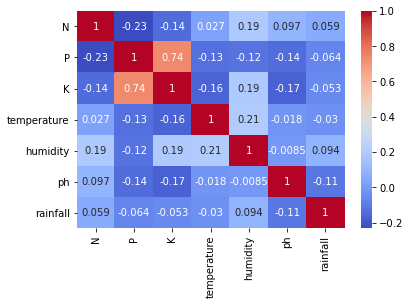

In [16]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [17]:
#data = new_data

# List of numerical columns for univariate analysis
#numeric_columns = ['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']

#sns.set(style="whitegrid")

#Histograms for each numeric feature to check their distribution
#for col in numeric_columns:
    #plt.figure(figsize=(8, 4))
    #sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    #plt.title(f"Distribution of {col}")
    #plt.xlabel(col)
    #plt.ylabel("Frequency")
    #plt.show()

## Exploratory Data Analysis

### Univariate Analysis

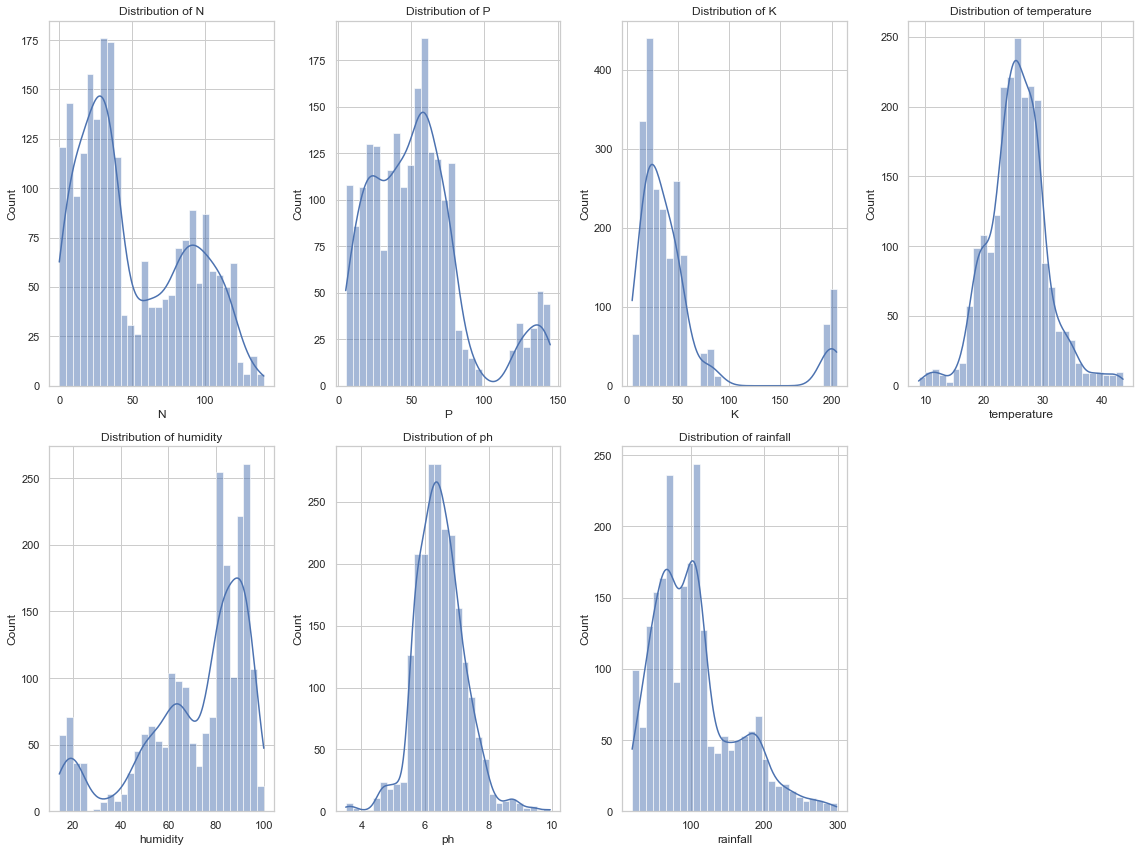

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Plot the distribution of each feature in a 2x4 grid
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(new_data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

### Bivariate Analysis

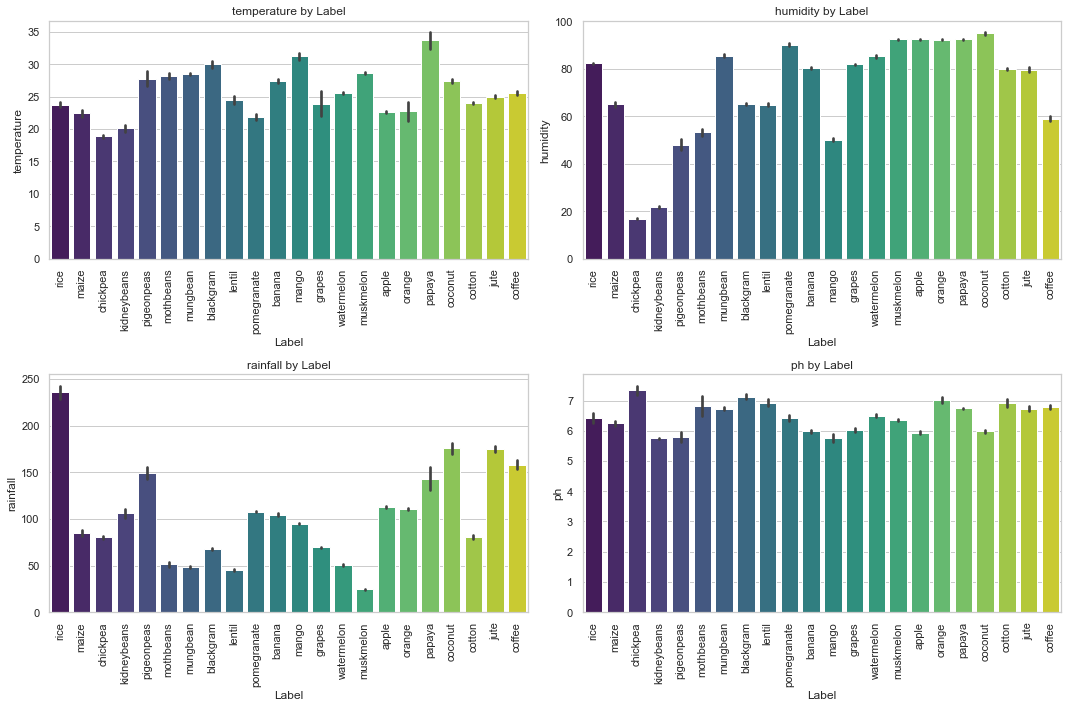

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot
selected_columns = ['temperature', 'humidity', 'rainfall', 'ph']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Loop through each column to create individual bar plots
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=new_data, x='label', y=col, palette='viridis')
    plt.title(f'{col} by Label')
    plt.xlabel('Label')
    plt.ylabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


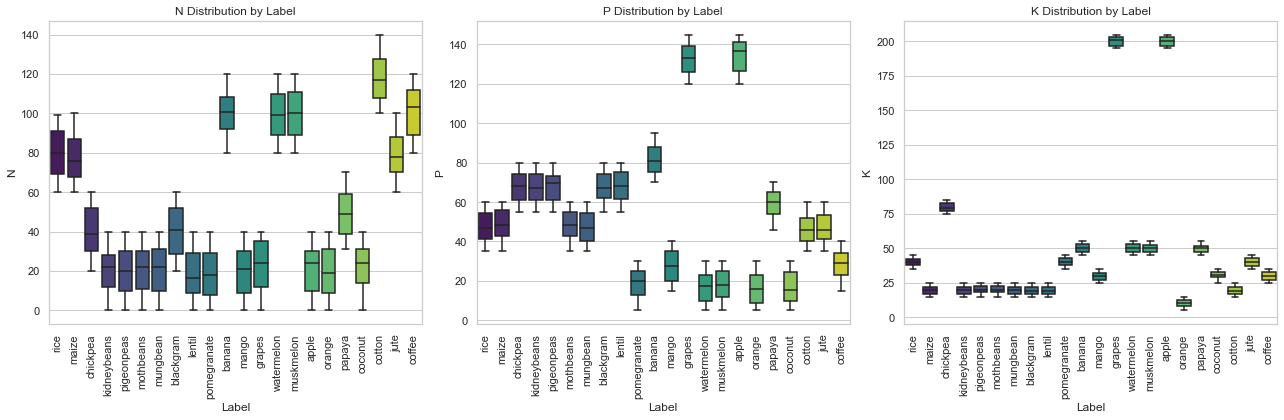

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(18, 6))

# Create box plots for each nutrient
nutrients = ['N', 'P', 'K']
for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=new_data, x='label', y=nutrient, palette='viridis')
    plt.title(f'{nutrient} Distribution by Label')
    plt.xlabel('Label')
    plt.ylabel(nutrient)
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()
